## Week 6 Assignment: Data Sets

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset.
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
**What can you infer about the relationships between (1) the women, and (2) the social events?  **

In [74]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

List of women's name

In [75]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


Clubs' name

In [76]:
print(clubs)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


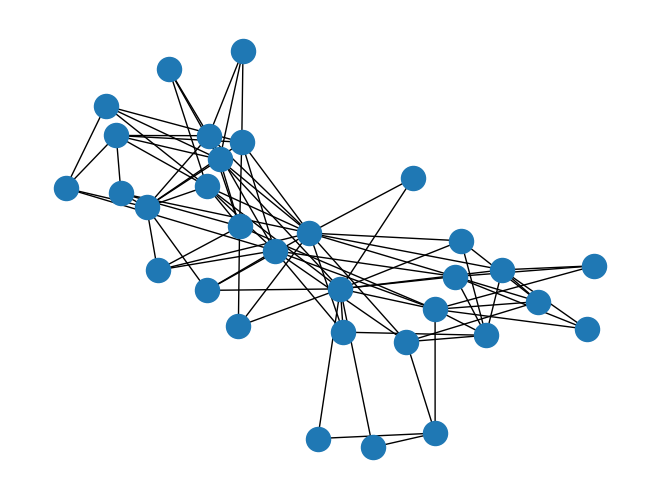

In [77]:
nx.draw(G)
plt.show()

In [78]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [79]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [80]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [81]:
# Compute centrality measures
degree_centrality = bipartite.degree_centrality(G, women)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Convert to DataFrame
df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Eigenvector Centrality': [eigenvector_centrality[n] for n in degree_centrality.keys()],
    'Type': ['Woman' if n in women else 'Event' for n in degree_centrality.keys()]
})

print(df)

                 Node  Degree Centrality  Eigenvector Centrality   Type
0    Theresa Anderson           0.571429                0.262027  Woman
1         Flora Price           0.142857                0.049194  Woman
2    Katherina Rogers           0.428571                0.155769  Woman
3    Evelyn Jefferson           0.571429                0.236692  Woman
4         Helen Lloyd           0.357143                0.141893  Woman
5    Charlotte McDowd           0.285714                0.118945  Woman
6    Frances Anderson           0.285714                0.147762  Woman
7    Pearl Oglethorpe           0.214286                0.127300  Woman
8         Eleanor Nye           0.285714                0.161465  Woman
9         Ruth DeSand           0.285714                0.166905  Woman
10  Dorothy Murchison           0.142857                0.092939  Woman
11   Laura Mandeville           0.500000                0.218654  Woman
12    Sylvia Avondale           0.500000                0.195992

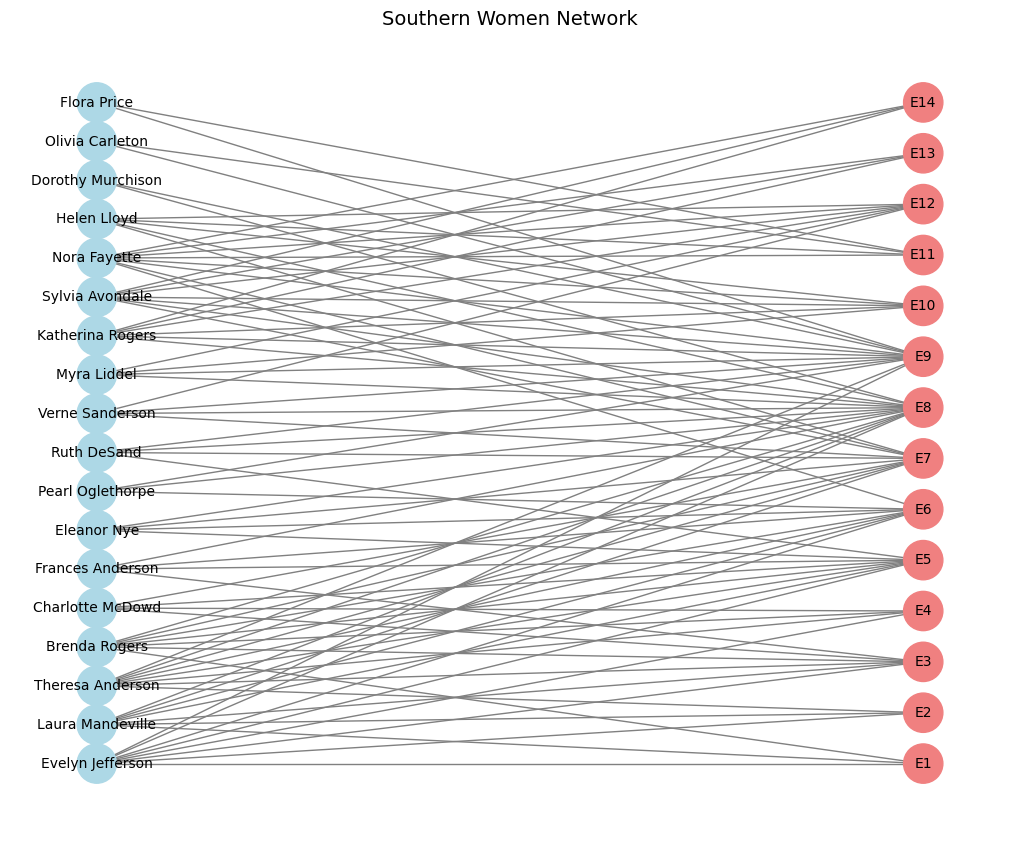

In [82]:
# Draw the graph
pos = nx.bipartite_layout(G, women)
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=['lightblue' if n in women else 'lightcoral' for n in G.nodes()],
    edge_color='gray', node_size=800, font_size=10
)

plt.title("Southern Women Network", fontsize=14)
plt.show()

**Graphic 1**
1. Key Women Social Figures: Evelyn, Jefferson, Laura Mandeville, and Nora Fayette have higher degree centrality. Meaning, they attended more events and played a main role in different event groups.

2. Some of the events are popular such as E9, E8, and E7. Some events connect women who wouldn't typically interact.

3. The socialnetwork was not random, it was around certain key figures and events. The shared event participation makes them closely tied together.

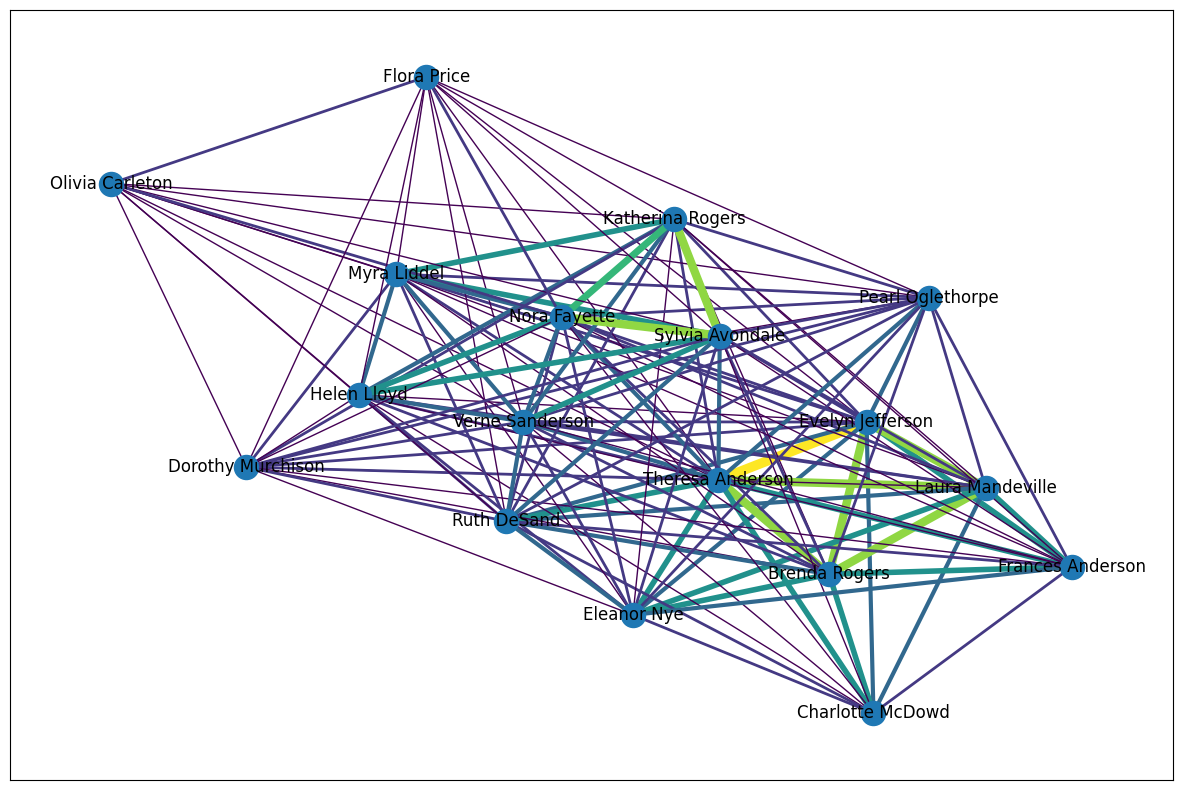

In [83]:
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (15,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

**Graphic 2**

**Key Observations:**

**Nodes**: Represent individual women

**Edges**: Represent attendance at events

**Edge Thickness**: Indicate the number of shared events.
Thicker edges = More shared events.

**Edge Color Variation**:
1. Lighter (yellow/green) edges likely indicate stronger relationships
2. Darker (blue/purple) edges represent weaker ties.

**Bridge figures**: Some women (such as Evelyn, Jefferson, Laura Mandeville, and Nora Fayette) connect across two or more communities, serving as bridges between the social circles.